# Modules

In [ ]:
import numpy as np
from math import sqrt
from collections import Counter
from matplotlib import style
import warnings
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

In [5]:
data = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}

In [30]:
new_features = [5,7]

# Visualization Of Our Sample Dataset

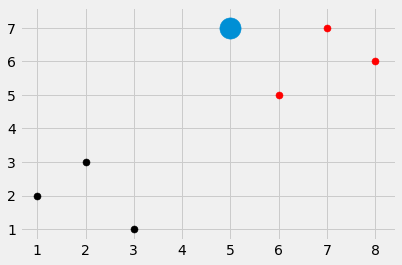

In [46]:
for i in data:
    for ii in data[i]:
        plt.scatter(ii[0],ii[1],s=50,color=i)

plt.scatter(new_features[0],new_features[1],s=450)

# Algorithm for KNN

In [44]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data)>=k:
        warnings.warn('Error...')
    distances = []
    for group in data:
        for feature in data[group]:
            euclidean_distance = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([euclidean_distance,group])
    
    ans = [i[1] for i in sorted(distances)[:k]]
    result = Counter(ans).most_common(1)[0][0]
    return result

# Testing Algorithm

r


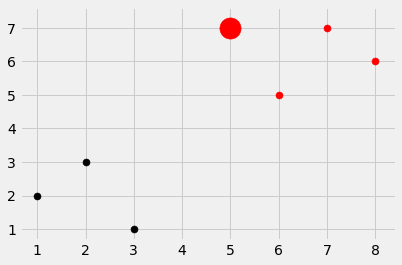

In [47]:
result = k_nearest_neighbors(data, new_features, 3)
print(result)
for i in data:
    for ii in data[i]:
        plt.scatter(ii[0],ii[1],s=50,color=i)

plt.scatter(new_features[0],new_features[1],s=450,color=result)

# Testing On Breast Cancer Dataset

In [49]:
import pandas as pd
import random

In [75]:
df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?', -9999, inplace=True)
df.drop(['id'], 1, inplace=True)
data = df.astype(float).values.tolist()
random.shuffle(data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2: [], 4:[]}

# Splitting data for training
train_data = data[:-int(test_size*len(data))]
test_data = data[-int(test_size*len(data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])


for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0
predictions = []
for group in test_set:
    for data in test_set[group]:
        ans = k_nearest_neighbors(train_set, data, k =5)
        predictions.append(ans)
        if group == ans:
            correct+=1
        total+=1

predict = Counter(predictions)
print('Belongs to Class {}'.format(predict.most_common(1)[0][0]))
print('Accuracy: ', (correct/total)*100)


Belongs to Class 2
Accuracy:  97.84172661870504
